# Estimation de paramètres de la loi Gamma

La densité de la  loi Gamma $\Gamma(a,b)$ est donnée par
$$f_{(a,b)}(x) = \frac{b^a}{\Gamma(a)}x^{a-1}e^{-bx},\quad x>0$$
avec des paramètres $a>0$ et $b>0$.  

Soit $\mathbf x=(x_1,\dots,x_n)$ une réalisation de $\mathbf X=(X_1,\dots,X_n)$ où les $X_i$ sont  i.i.d. de la loi Gamma $\Gamma(a,b)$.

L'objectif de ce TP est l'estimation des paramètres $a$ et $b$ à partir des observations  $\mathbf x$.


## Estimateur du maximum de vraisemblance

La fonction de log-vraisemblance dans ce modèle s'écrit
$$\ell(a,b) = \sum_{i=1}^n\log f_{(a,b)}(x_i)= na\log(b) -n\log(\Gamma(a)) +(a-1)\sum_{i=1}^n\log(x_i) -b\sum_{i=1}^nx_i$$

L'estimateur du maximum de vraisemblance de $a$ et $b$ est donné par
$$(\hat a, \hat b) = \arg\max_{a>0,b>0}\ell(a,b).$$




## Graphiques en 3D
Pour la représentation graphique d'une fonction $f:\mathcal A\subset\mathbb R^2\mapsto \mathbb R$ on peut tracer un graphique en trois dimensions. Plusieurs solutions existent sous R, et chacune  nécessistent  des libraries spécifiques, qu'il faut éventuellement installer sur votre machine (avec la commande **install.packages()**). 

Nous présentons ici deux solutions pour tracer les valeurs d'une fonction $f(x,y)$. La première crée un graphique interactif, très abouti. Cette solution est à préférer. Malheureusement, elle ne fonctionne pas toujours sur les machines à l'UTES. La deuxième solution crée un graphique statique, moins joli que l'autre, mais qui fonctionne plus souvent.

### 1. Plot 3D interactif
Pour tracer les valeurs d'une fonction $f(x,y)$, on peut utiliser la fonction **plot_ly** du package **plotly** :


où **x.grid** et **y.grid** sont des vecteurs contenant des grilles de valeurs pour l'abscisse et l'ordonnée, et **z.values** est une matrice de taille **length(x.grid)**$\times$**length(y.grid)** avec les valeurs correspondantes de $f(x,y)$. L'option **type='surface'** interpole les points pour une représentation continue de la fonction $f$.

### 2. Plot 3D statique
Pour tracer les valeurs d'une fonction $f(x,y)$, on peut aussi utiliser la fonction **ggplot** et pour cela  il faut charger les packages **ggplot2** et **plyr**. L'instruction est la suivante :

où **df** est un dataframe avec trois colonnes, ici de nom **x**, **y** et **f_xy**. Chaque ligne de **df** donne les coordonnées d'un point à tracer, à savoir $(x,y,f(x,y))$. Par conséquent, pour tracer tous les points de $f$ pour des grilles de valeurs **x.grid** et **y.grid**, il faut créer un dataframe **df** avec **length(x.grid)**$*$**length(y.grid)** lignes.

## Question 1

- Ecrire une fonction qui évalue la fonction de log-vraisemblance $\ell(a,b)$. Elle prend en argument des valeurs pour les paramètres $a$ et $b$ et les observations $\mathbf x=(x_1,\dots,x_n)$. Pour calculer la fonction Gamma on utilisera la fonction **gamma**.
- Ecrire une fonction qui permet de visualiser la fonction de log-vraisemblance en trois dimensions. Créer un plot interactif si votre machine le permet.
- Faites des représentations graphiques pour différents jeux de données simulés de tailles différentes et avec différentes valeurs de paramètres $a$ et $b$  (la fonction **rgamma** tire des observations de la loi Gamma). Quelle est l'allure typique de la fonction de log-vraisemblance ? Combien de points critiques a-t-elle ? Ou est situé le   maximum  de la fonction ?

In [1]:
log_vrais <- function(a,b,obs){
  n <- length(obs)
  log_vrais <- n*a*log(b)-n*log(gamma(a))+(a-1)*sum(log(obs))-b*sum(obs)
  return(log_vrais)
}

In [2]:
library(ggplot2)
library(plyr)

log_vrais3D <- function(obs, a.grid=seq(.1,5,by=.01), b.grid=seq(.1,5,by=.01)){
  L <- sapply(1:length(b.grid), function(i) return(log_vrais(a.grid,b.grid[i],obs)))
  A <- length(a.grid)
  B <- length(b.grid)
  df <- data.frame(a=rep(a.grid,times=B), b=rep(b.grid,each=A), log_vrais=c(L))  # création d'un df pour ggplot
  p <- ggplot(df, aes(a, b, z=log_vrais)) + geom_contour(bins = 60, aes(colour = ..level..))
  return(p)
}

Warning message:
"package 'plyr' was built under R version 3.6.2"

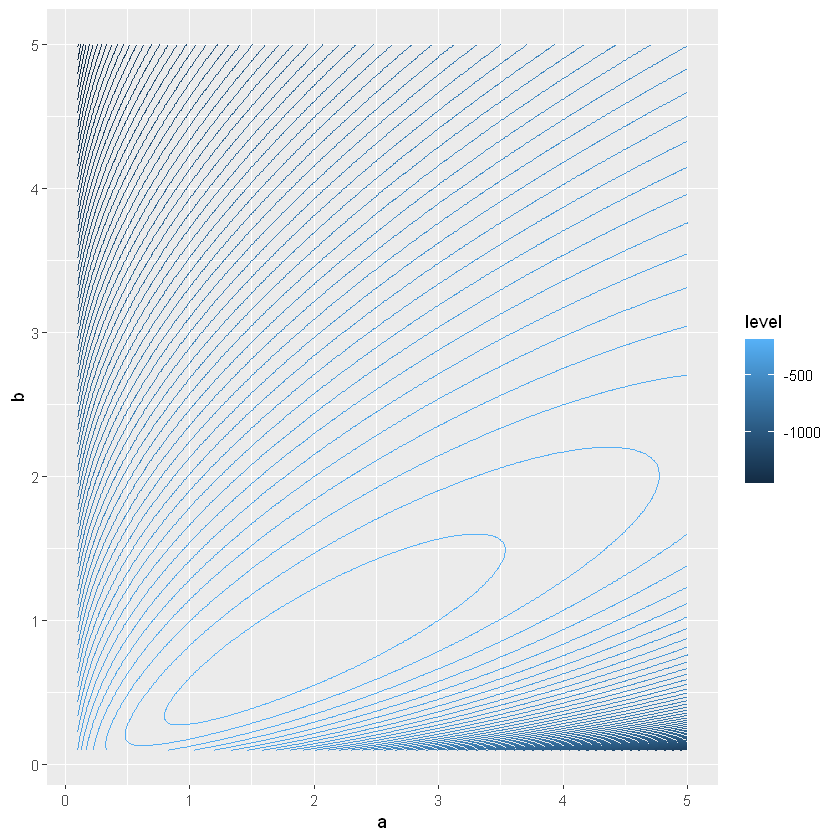

In [3]:
obs <- rgamma(100,2,.8)
log_vrais3D(obs) 

 La log-vraisemblance est une fonction concave qui atteint son maximum en les vraies valeurs des paramètres (ou presque)

## Calcul de l'EMV par la méthode de Newton-Raphson
On peut montrer que l'EMV n'admet pas d'expression explicite (voir TD). En revanche, on peut recourir à la méthode de Newton-Raphson pour l'approcher. Plus précisément, on peut l'appliquer afin de trouver des points critiques de $\ell(a,b)$. 

### Une mise à jour de Newton-Raphson
Rappelons que la méthode de Newton-Raphson est un algorithme itératif. Notons  $(a^{(t)},b^{(t)})^T$ les valeurs actuelles de paramètres. Une itération de l'algorithme consiste à calculer les nouvelles valeurs des paramètres $(a^{(t+1)},b^{(t+1)})^T$ par la formule
$$(a^{(t+1)},b^{(t+1)})^T = (a^{(t)},b^{(t)})^T-[H(a^{(t)},b^{(t)})]^{-1}\nabla\ell(a^{(t)},b^{(t)}),\qquad\qquad(*)$$
où 
$H$ désigne la matrice Hessienne de $\ell$.
Pour le gradient et l'inverse de la Hessienne on obtient (voir TD pour les calculs détaillés) 
\begin{align*}
\nabla\ell(a,b) &= \left(\frac\partial{\partial a} \ell(a,b),\frac\partial{\partial b} \ell(a,b)\right)^T
=\left(
n\log b- n (\log\Gamma(a))'+\sum_{i=1}^n\log x_i,\quad
\frac{na}b-\sum_{i=1}^n x_i
\right)^T
\end{align*}
et
\begin{align*}
[H(a,b)]^{-1}
=\left(\begin{array}{cc}
\frac{\partial^2}{\partial^2 a} \ell(a,b)&\frac{\partial^2}{\partial a\partial b} \ell(a,b)\\
\frac{\partial^2}{\partial a\partial b} \ell(a,b)&\frac{\partial^2}{\partial^2 b} \ell(a,b)
\end{array}\right)^{-1}
&=
 \frac1{n\left(1-a(\log\Gamma(a))''\right)}
\left(\begin{array}{cc}
a&b\\
b&b^2(\log\Gamma(a))''
\end{array}\right)
\end{align*}

## Question 2
Ecrire une fonction R qui effectue une mise à jour des paramètres. Cette fonction prend en argument les valeurs actuelles des paramètres, $a^{(t)}$ et  $b^{(t)}$, ainsi que les données. Elle renvoie les nouvelles valeurs des paramètres $a^{(t+1)}$ et  $b^{(t+1)}$ obtenues par $(*)$. Pour les dérivées de  $\log\Gamma(a)$  utiliser les fonctions **digamma** et **trigamma** (regarder l'aide de R pour les détails !!). Vous pouvez compléter la fonction suivante :




In [4]:
update_newton <- function(param, obs){
  # param : liste des paramètres a et b
  # obs - vecteur de données
  n <- length(obs)
  gradient <- c(n*log(param$b)-n*digamma(param$a)+sum(log(obs)), n*param$a/param$b-sum(obs))
  w <- trigamma(param$a)
  detH <- 1/n/(1-param$a*w)
  # calcul des nouvelles valeurs des paramètres :
  a.new <- param$a - detH*sum(c(param$a,param$b)*gradient)
  b.new <- param$b - detH*sum(c(param$b,param$b^2*w)*gradient)
  return(list(a=a.new,b=b.new))
}

### Itérer les mises à jour

La méthode de Newton-Raphson consiste à répéter les mises à jour décrites ci-dessus pour $t=1,2,\dots$ par une boucle **while** jusqu'à convergence. Il nous faut alors un critère d'arrêt qui vérifie après chaque itération si l'algorithme a convergé. 

### Critère d'arrêt
Plusieurs critères d'arrêt sont envisageable. Ici nous allons considérer le critère qui repose sur la fonction à maximiser $\ell(a,b)$. Ainsi,  on arrête les calculs dès que la valeur de la log-vraisemblance est stable. Plus précisément, on arrête dès que
$$\left|\frac{\ell(a^{(t+1)},b^{(t+1)})-\ell(a^{(t)},b^{(t)})}{\ell(a^{(t+1)},b^{(t+1)})}\right|<\varepsilon,$$
où $\varepsilon>0$ est un seuil fixé.  

### Initialisation
La méthode de Newton nécessite un point d'initialisation $(a^{(0)},b^{(0)})^T$. C'est à l'utilisateur de le choisir. Nous verrons l'importance d'un bon choix du point initial.

## Question 3
Ecrire une fonction, nommée **emv_gamma**, qui calcule l'EMV en utilisant la méthode de Newton-Raphson. Elle prend en argument les données et les valeurs initiales $a^{(0)}$ et $b^{(0)}$. En partant de ces valeurs initiales on itère des mises à jour des paramètres selon la méthode de Newton jusqu'à convergence. Utilisez le critère d'arrêt ci-dessus avec le seuil $\varepsilon=10^{-3}$. La fonction renvoie les estimateurs de $a$ et $b$ et le nombre d'itérations effectuées. Vous pouvez compléter la fonction suivante :



In [5]:
emv_gamma <- function(obs,param){
  # obs - vecteur de données
  # param - liste de paramètres: param$a, param$b
  epsilon <- 10^{-3}
  param.old <- param
  log_vrais.old <- log_vrais(param.old$a,param.old$b,obs)
  not.converged <- TRUE
  nb.iter <- 0
  while (not.converged){
    # mise à jour des paramètres :
    param.new <- update_newton(param.old,obs)
    # vérifier le critère d'arrêt :
    log_vrais.new <- log_vrais(param.new$a,param.new$b,obs)
    not.converged <- (abs((log_vrais.new-log_vrais.old)/log_vrais.new)>epsilon)
    param.old <- param.new   
    log_vrais.old <- log_vrais.new
    nb.iter <- nb.iter + 1
  }
  return(list(param=param.new,nb.iter=nb.iter))  
}

## Question 4
Afin d'éviter que l'algorithme tourne indéfiniment, modifier la fonction en sorte que l'on s'arrête lorsque l'algorithme à convergé  **ou** après au plus 100 itérations.



In [6]:
emv_gamma <- function(obs, param){
  # obs - vecteur de données
  # param - liste de paramètres: param$a, param$b
  epsilon <- 10^{-3}
  nb.iter.max <- 100  
  param.old <- param
  log_vrais.old <- log_vrais(param.old$a, param.old$b,obs)
  not.converged <- TRUE
  nb.iter <- 0
  while ((not.converged) & (nb.iter <= nb.iter.max)){  #modification
    # mise à jour des paramètres :
    param.new <- update_newton(param.old,obs)
    # vérifier le critère d'arrêt :
    log_vrais.new <- log_vrais(param.new$a,param.new$b,obs)
    not.converged <- (abs((log_vrais.new-log_vrais.old)/log_vrais.new)>epsilon)
    param.old <- param.new
    log_vrais.old <- log_vrais.new
    nb.iter <- nb.iter + 1
  }
  return(list(param=param.new, nb.iter=nb.iter))  
}

## Question 5
Testez votre fonction sur des données simulées. Testez différentes valeurs de paramètres $a$ et $b$ ainsi que différentes tailles d'échantillons. Pour commencer, initialisez toujours avec les vraies valeurs des paramètres. Dans ce cas, l'algorithme doit converger très rapidement. Si ce n'est pas le cas, votre programme contient des bugs qu'il faut corriger !


In [7]:
emv_gamma(rgamma(100,3,3), list(a=3,b=3))

$param
$param$a
[1] 3.472749

$param$b
[1] 3.499245


$nb.iter
[1] 2

## Question 6
- Essayez maintenant d'initialiser avec des points initiaux de plus en plus éloignés des vraies valeurs des paramètres. Qu'observez-vous ? Chercher à comprendre ce qui se passe.
- On observe parfois que cela produit des erreurs. En fait, il arrive que la fonction **update_newton** renvoie des valeurs négatives pour **a** et/ou **b** (ce qui n'est pas admissible du point de vue d'interprétation de $a$ et $b$ comme paramètres de la loi Gamma, mais la méthode de Newton ne respecte pas le domaine de définition). Dans ce cas, le calcul de la fonction de log-vraisemblance produit des erreurs. Modifiez la fonction **emv_gamma** en sorte qu'elle arrête l'algorithme dès que **update_newton** renvoie des valeurs négatives.




In [8]:
emv_gamma(rgamma(200,0.2,4), list(a=1,b=1))

Warning message in log(b):
"production de NaN"

ERROR: Error in while ((not.converged) & (nb.iter <= nb.iter.max)) {: valeur manquante là où TRUE / FALSE est requis


### Initialisation avec l'estimateur par la méthode des moments

Un autre estimateur des paramètres $a$ et $b$ dans ce modèle est donné par l'estimateur par la méthode des moments (EMM). En TD vous montrez que cet estimateur est donné par
$$\tilde a = \frac{(\bar X_n)^2}{s_X^2},\qquad \tilde b = \frac{\bar X_n}{s_X^2},$$
où $s_X^2=\frac1n\sum_{i=1}^n(X_i-\bar X_n)^2$ désigne la variance empirique.


## Question 7
Ecrire une fonction nommée **emm_gamma** qui prend en argument les observations et renvoie l'estimateur par la méthode des moments de $a$ et $b$.



In [9]:
emm_gamma <- function(obs){
  n <- length(obs)
  b <- mean(obs)/(var(obs)*(n-1)/n)
  a <- b*mean(obs)
  return(list(a=a, b=b))
}

## Question 8
Modifier votre fonction  **emv_gamma** en sorte que par défaut elle utilise comme valeurs initiales l'estimateur par la méthode des moments $\tilde a$ et $\tilde b$. Etudier de nouveau la convergence de l'algorithme sur des données simulées.


In [10]:
emv_gamma <- function(obs, param=emm_gamma(obs)){
  # obs - vecteur de données
  # param - liste de paramètres: param$a, param$b
  epsilon <- 10^{-3}
  nb.iter.max <- 100  
  param.old <- param
  log_vrais.old <- log_vrais(param.old$a, param.old$b,obs)
  not.converged <- TRUE
  nb.iter <- 0
  while ((not.converged) & (nb.iter <= nb.iter.max)){
    # mise à jour des paramètres :
    param.new <- update_newton(param.old, obs)
    if (sum(c(param.new)>0)==2){
      # vérifier le critère d'arrêt :
      log_vrais.new <- log_vrais(param.new$a, param.new$b,obs)
      not.converged <- (abs((log_vrais.new-log_vrais.old)/log_vrais.new)>epsilon)
      param.old <- param.new
      log_vrais.old <- log_vrais.new
    }
    else{
      not.converged <- FALSE
      }
    nb.iter <- nb.iter + 1  
  }
  return(list(param=param.new, nb.iter=nb.iter))  
}

In [11]:
# voilà le jeu de données de tout à l'heure qui ne marchait pas:
set.seed(12)
obs <- rgamma(200,.2,4)
emv_gamma(obs)

$param
$param$a
[1] 0.2243611

$param$b
[1] 5.601304


$nb.iter
[1] 2

In [12]:
emv_gamma(rgamma(50,2,3))

$param
$param$a
[1] 1.918172

$param$b
[1] 2.881296


$nb.iter
[1] 2

### Application aux données des lynx

## Question 9
Charger le package **datasets** (par l'instruction **library(datasets)**) qui contient le jeu de données nommé **lynx**. 
Estimer les paramètres de  la loi Gamma pour les données des lynx. Superposer la densité estimée à l'histogramme. Comparer avec la densité exponentielle ajustée aux données. Commenter.


$a
[1] 0.8932879

$b
[1] 0.0005808048

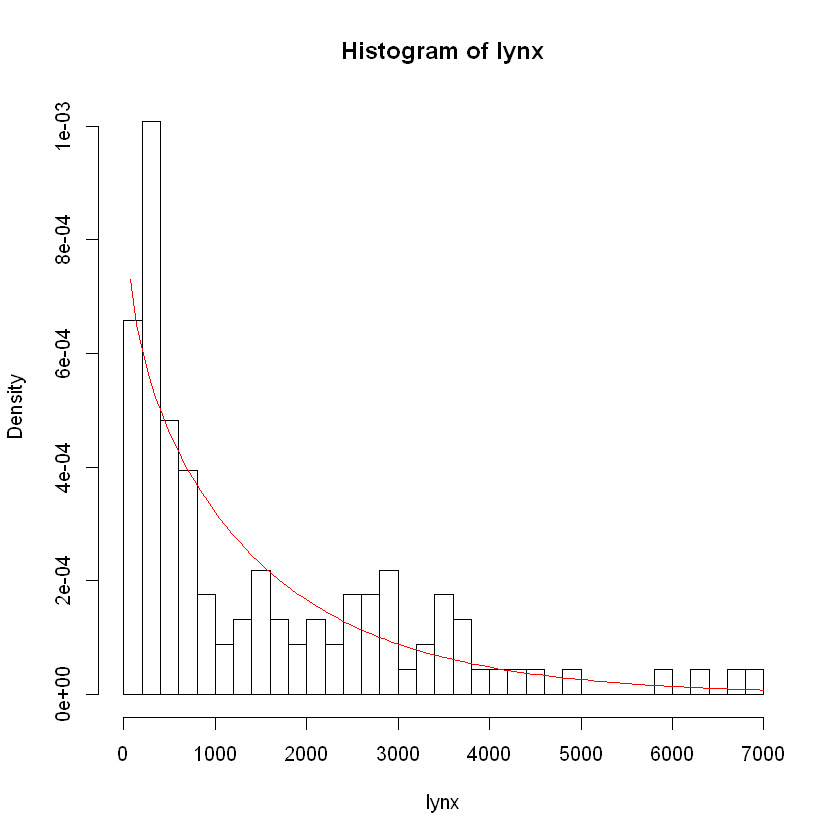

In [13]:
library(datasets)
param <- emv_gamma(lynx)$param
param
hist(lynx, breaks=30, freq=FALSE)
curve(dgamma(x, param$a, param$b), add=TRUE,col='red')

## Comparaison de l'EMV et de l'EMM
On veut comparer les deux estimateurs, EMV et EMM, des paramètres de la loi Gamma. On cherche à savoir lequel a le plus petit risque quadratique. 

Rappelons que le risque quadratique d'un estimateur $\hat\theta$ d'un paramètre $\theta$ est défini par $\mathcal R(\hat\theta,\theta)= \mathbb E[\|\hat\theta-\theta\|^2]$.


## Question 10
Ecrire un programme qui 
- génère un grand nombre de jeux de données de loi Gamma,
- évalue les deux estimateurs sur ces données et
- calcule une approximation du risque quadratique des deux estimateurs.


In [14]:
comp_risk <- function(a, b, n, R=1000, seed=17){
    
  # a,b - paramètres de la loi Gamma
  # n - taille d'échantillon
  # R - nb d'échantillon à simuler
  
    
    # evaluation des 2 estimateurs 
  set.seed(seed) # pour utiliser les mêmes données pour les deux estimateurs
  emv <- replicate(R,as.numeric(emv_gamma(rgamma(n, a, b))$param))  
  risk_emv <- sum((emv - matrix(c(a, b), nrow=2, ncol=R))^2)/R
  
  set.seed(seed) 
  emm <- replicate(R,as.numeric(emm_gamma(rgamma(n, a, b))))  
  risk_emm <- sum((emm - matrix(c(a, b), nrow=2, ncol=R))^2)/R
  
  return(list(risk_emm=risk_emm, risk_emv=risk_emv))
}


## Question 11
Faites des simulations pour savoir quel estimateur a la meilleur performance.

In [15]:
comp_risk(1, 2, 200)

$risk_emm
[1] 0.1433704

$risk_emv
[1] 0.0716935

In [16]:
comp_risk(1, 2, 2000)

$risk_emm
[1] 0.01237624

$risk_emv
[1] 0.006168896

risque emv semble le meilleur 